In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gauss(x,xc=0,sigma=0.5):
    return np.exp(-0.5*(x-xc)**2/sigma**2)

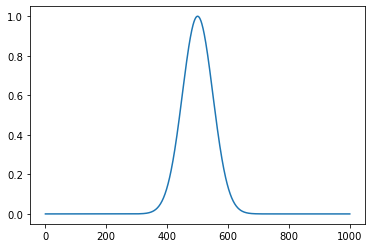

In [3]:
N = 3
Nbig = int(1e3)+1       # ODD
f_k = np.zeros(Nbig)
xc = int((Nbig-1)/2)
sigma = int(Nbig/20)
#kvec = np.arange(0,Nbig)-(Nbig-1)/2
kvec = np.arange(0,Nbig)
for i in np.arange(Nbig):
    f_k[i] = gauss(i, xc, sigma)
plt.plot(kvec,f_k)

-0.0005308917142476668


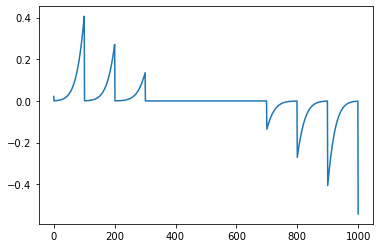

In [7]:
somme = np.zeros(Nbig)
p = 0
kvec = np.arange(0,Nbig)
#kvec = kvec - (Nbig-1)/2
for k in kvec:
    sum = 0
    #print("k = "+str(k))
    for j in np.arange(1, max(int(((Nbig-1)/2-k)/N), int((k-(Nbig-1)/2)/N))):
        if k+j*N < (Nbig-1)/2:
            # Need to convert k to index (k+j*N is the index "k+j*N + (N-1)/2+1")
            #index = int(k+j*N + (Nbig-1)/2 + 1)
            # Because negative indexes of matematical array f_k are mapped into positive
            # indexes in python
            index = int(k+j*N)
            sum = sum + j*f_k[index]
        if k-j*N > -(Nbig-1)/2:
            #index = int(k-j*N + (Nbig-1)/2 + 1)
            index = int(k-j*N)
            sum = sum - j*f_k[index]
    somme[p] = sum
    p = p + 1

plt.plot(kvec,somme)
print(np.average(somme))

In [5]:
min(1,2)

1

array([-1.99742175, 10.11646213])

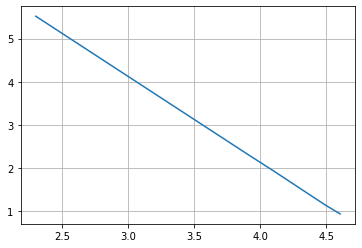

In [9]:
#somme = np.zeros(Nbig)
p = 0
k = -200
Ns = np.array([10,20,30,40,50,60.70,80,90,100])
somme = np.zeros(len(Ns))
for N in Ns:
    sum = 0
    #print("k = "+str(k))
    for j in np.arange(1, Nbig):
        if k+j*N < (Nbig-1)/2:
            #print("j = "+str(j))
            # Need to convert k to index (k+j*N is the index "k+j*N + (N-1)/2+1")
            index = int(k+j*N + (Nbig-1)/2 + 1)
            sum = sum + j*f_k[index]
        if k-j*N > -(Nbig-1)/2:
            index = int(k-j*N + (Nbig-1)/2 + 1)
            sum = sum - j*f_k[index]
    somme[p] = sum
    p = p + 1

plt.plot(np.log(Ns),np.log(somme))
plt.grid()
np.polyfit(np.log(Ns),np.log(somme),1)